In [ ]:
import time
import matplotlib.pyplot as plt
import random
from scipy import stats
import math
import numpy as np

In [ ]:
# POLINOMIAL MULTIPLICATION
# given P which is a list with n floats where P[i] is the coeficent of x^i in P
# given Q which is a list with n floats where Q[i] is the coeficent of x^i in Q
# find P x Q
# solution will be a list of length 2*n-1 since the highest order term will be x^(n-2) + the zero order term

def polyMultSchool(P, Q, n):
  # P Q are polynomials of length n
  # create an array of the solution
  PQ = [0]*2*n
  # enumerate through each coeficient in P
  for i in range(0, n):
    # enumerate through each coeficient in Q
    for j in range(0, n):
      # multiply the coeficients AND ACCUMULATE THEM IN THE CORRECT PLACE IN THE SOLUTION
      # recall that (p_i * x^i) * (q_j * x^j) = p_i * q_j * x^(i+j)
      PQ[i+j] = PQ[i+j] + P[i] * Q[j]
      # since many combinations of i and j lead to the same sum, we have to accumulate the values
  return PQ


In [ ]:
def polyMult4(P, Q, n):
  # input is P and Q of LENGTH n
  # if n is how many terms in the polynomial
  # so the order of the polynomial is n-1
  # is the product of the polynomials of length 2*n
  # n is a power of 2!
  # simple problem --> simple solution
  # zero order poly with 1 term (p_0)
  if n == 1:
    # need to add the high order term because must return solution of length 2*n
    return [P[0] * Q[0], 0] 
  m = n//2
  # generate 4 problems of 1/2 size and solve them
  sol_PL_QL = polyMult4(P[0:m], Q[0:m], m)
  sol_PH_QL = polyMult4(P[m:], Q[0:m], m)
  sol_PL_QH = polyMult4(P[0:m], Q[m:], m)
  sol_PH_QH = polyMult4(P[m:], Q[m:], m)
  # reconstruct the solution. Use the powers of x in the math as indexes!
  PQ = [0]*2*n # solution is of length 2n
  for i in range(0, n):
    PQ[i] += sol_PL_QL[i]
    PQ[i + m] += sol_PH_QL[i] + sol_PL_QH[i]
    PQ[i + n] += sol_PH_QH[i]
  return PQ

In [ ]:
#the function which divides the polynomial into smaller pieces and solves them recursively.
#takes two polynomial arrays with the number of their coefficients as parameters
# return the array which stores the product of the polynomial
def polyMult3(P,Q,n):
  if n == 1:
    return [P[0] * Q[0], 0] 
   #dividing the problem to 'd' number of coefficients
  d = n//2
   #split p and q into arrays that store low and high order terms respectively
  p_high = [0]*d
  q_high = [0]*d        
  p_low =  [0]*(d-n%2)
  q_low =  [0]*(d-n%2)
  #assigning the respective coefficients to low and high arrays of p and q
  for i in range(d):
    p_high[i] = P[i+d]
    q_high[i] = Q[i+d]
    p_low[i] = P[i]
    q_low[i] = Q[i]
  #arrays to store addition
  add_p_high_low = [0]*d
  add_q_high_low = [0]*d  

  for i in range(d):
     add_p_high_low[i] = p_low[i]+p_high[i]
     add_q_high_low[i] = q_low[i]+q_high[i]

  #Three subproblems
  low_PQ = polyMult3(p_low,q_low,d)
  mid = polyMult3(add_p_high_low,add_q_high_low,d);  
  high_PQ = polyMult3(p_high,q_high,d);

  # the array that stores the product of the polynomials
  PQ=[0]*((2 * n))

  for i in range(n-1):
    PQ[i] += low_PQ[i]
    PQ[i+d] += mid[i]  - low_PQ[i] - high_PQ[i]
    PQ[i+2*d] += high_PQ[i]

  return PQ

[0.17404556274414062, 0.6501674652099609, 2.499818801879883, 11.344194412231445, 51.378488540649414, 214.2047882080078, 884.3355178833008, 3498.5013008117676, 14101.668357849121, 58522.37915992737]
Function polyMultSchool time = 0.000131 n ^ 2.056
[0.577092170715332, 2.2182464599609375, 9.083032608032227, 36.281466484069824, 156.4122438430786, 610.5921268463135, 2489.13311958313, 9968.021512031555, 40055.45949935913, 163017.40288734436]
Function polyMult4 time = 0.000519 n ^ 2.016
[0.5430380503336588, 1.934051513671875, 7.511615753173828, 28.52797508239746, 117.10508664449056, 445.9106922149658, 1780.6050777435303, 7004.94917233785, 27794.76761817932, 111960.51414807637]
Function polyMult3 time = 0.000547 n ^ 1.968


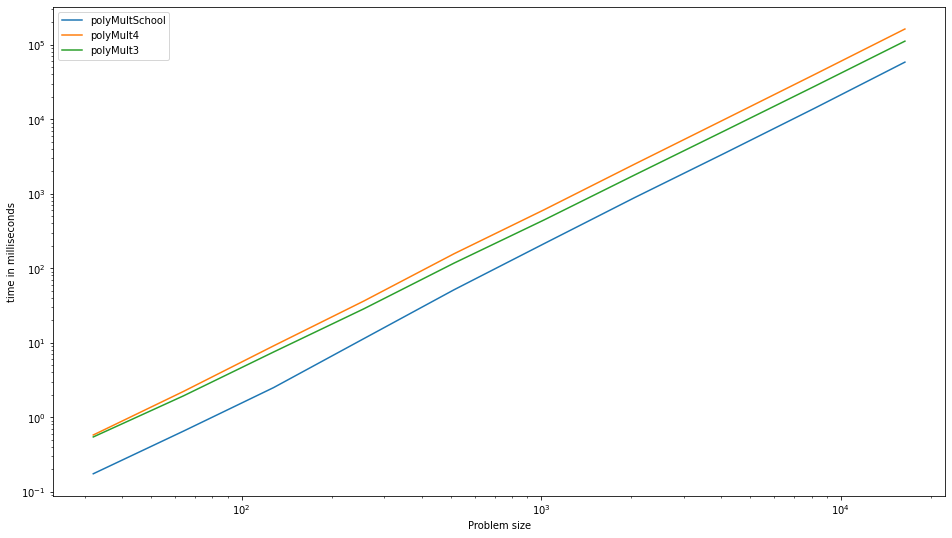

In [ ]:
#test 10 random problems 2^5 to 2^14 (ints) each and then cmpute average timimg for each problem size and generate a graph
problemSizes = [2**i for i in range(5, 15)]
problemList = [(i, ([random.randint(0,100) for j in range(0,i)], 
                    [random.randint(0,100) for j in range(0,i)], i)) for i in problemSizes]
timeCompareFunctions(problemList, [polyMultSchool, polyMult4,polyMult3], init = None, fit = 'polynomial')

[0.19986629486083984, 0.7447719573974609, 2.539801597595215, 11.923670768737793, 50.209856033325195, 211.07242107391357]
Function polyMultSchool time = 0.000166 n ^ 2.019
[0.6111979484558105, 2.2728562355041504, 8.86850357055664, 37.22270727157593, 150.132155418396, 612.0856881141663]
Function polyMult4 time = 0.000565 n ^ 2.001
[0.5552291870117188, 1.9818862279256184, 7.302149136861165, 29.243087768554688, 113.25133641560872, 447.4547227223714]
Function polyMult3 time = 0.000641 n ^ 1.937


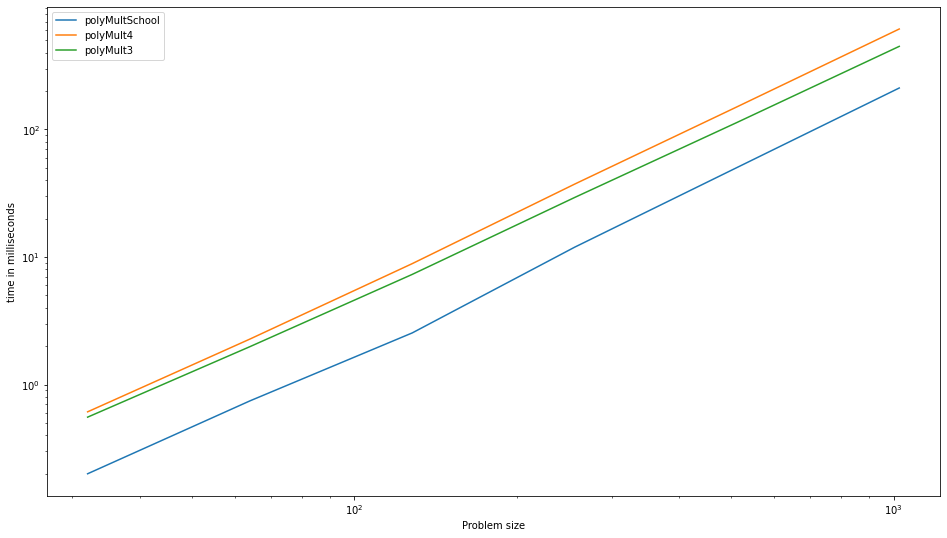

In [ ]:
#test 10 random problems 2^5 to 2^10 each(ints) and then cmpute average timimg for each problem size and generate a graph
problemSizes = [2**i for i in range(5, 11)]
problemList = [(i, ([random.randint(0,100) for j in range(0,i)], 
                    [random.randint(0,100) for j in range(0,i)], i)) for i in problemSizes for _ in range (10)]
timeCompareFunctions(problemList, [polyMultSchool, polyMult4, polyMult3], init = None, fit = 'polynomial')

[0.25649070739746094, 0.690913200378418, 2.338552474975586, 9.265685081481934, 41.98765754699707, 173.45380783081055]
Function polyMultSchool time = 0.000272 n ^ 1.908
[0.612938404083252, 2.1675825119018555, 8.516156673431396, 34.66612100601196, 139.0146255493164, 562.5980019569397]
Function polyMult4 time = 0.000604 n ^ 1.978
[0.5554755528767904, 1.9041856129964192, 7.049075762430827, 27.25263436635335, 105.57580788930257, 412.136967976888]
Function polyMult3 time = 0.000685 n ^ 1.914


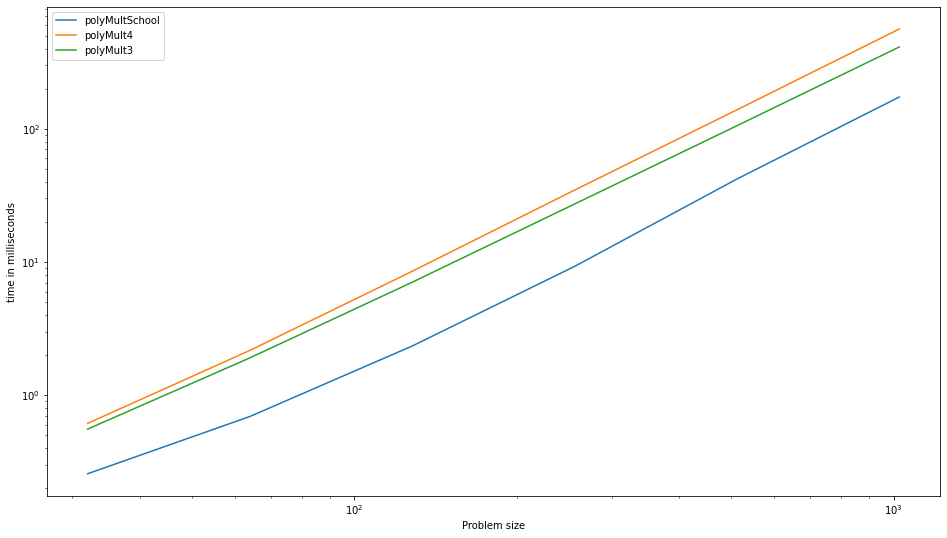

In [ ]:
#test 10 random problems(floats) 2^5 to 2^10 each and then cmpute average timimg for each problem size and generate a graph
problemSizes = [2**i for i in range(5, 11)]
problemList = [(i, ([random.uniform(0,100) for j in range(0,i)], 
                    [random.uniform(0,100) for j in range(0,i)], i)) for i in problemSizes for _ in range (10)]
timeCompareFunctions(problemList, [polyMultSchool, polyMult4, polyMult3], init = None, fit = 'polynomial')

In [ ]:
##Calculates the time taken by each function call and generates graph
def timeCompareFunctions(problemList, functionList, init = None, fit = 'exponential'):
  #problemList is a list of tuples [(size, arguments),...] ordered smallest to biggest
  #runs and times the functions contained in functionList with each arguments 
  #generates a graph of run time as a function of problem size
  # fit may be 'exponential' then the time as a function of problem size is assumed
  #     to of the form time = c * a^n and the function solves for c and a
  #     where a is the base of the exponential function and c is a multiplicative factor
  # fit my be 'polynomial' then the time as a function of problem size is assumed
  #     to of the form time = c * n ^ b and the function solves for c and b 
  #     where b is the power of n (the degree of the polynomial) and c is a multiplicative factor
  # setup the graph
    plt.xlabel("Problem size")
    plt.yscale('log')
    if fit == 'polynomial':
      plt.xscale('log')
    plt.ylabel("time in milliseconds")
    plt.rcParams["figure.figsize"] = [16,9]
 # get the problem sizes
    values = list(set([size for (size, args) in problemList]))
    values.sort()
    # if not functionList is list:
    #   functionList = [functionList]
    # loop through each function
    time_dict={}
    for function in functionList:
      functionName = str(function).split(" ")[1]
      
      for (size, args) in problemList:
        
        start_time = time.time()
        function(*args) #use the * to unpack the tuple into arguments to the function
        elapsed = (time.time() - start_time)*1000.0
        if size in time_dict.keys():
          time_dict[size].append(elapsed)
        else:
          time_dict[size] = [elapsed]
      timeLine = []
      for key in time_dict:
        sum1= sum(time_dict[key])/len(time_dict[key])
        timeLine.append(sum1)
      

      ##Generating the plot between time taken by each function call with n as variable and n
      plt.plot(values, timeLine, label = functionName)
      # fit these timing studies to a curve
      if fit == 'exponential': #fit a straight line to n and log time
        slope, intercept, _, _, _ = stats.linregress([values], [np.log(t) for t in timeLine])
        print("Function %s time = %.6f %.3f ^ n" % (functionName, np.exp(intercept), np.exp(slope)))
      elif fit == 'polynomial': # fit a straight line to log n and log time
        slope, intercept, _, _, _ = stats.linregress([np.log(v) for v in values], [np.log(t) for t in timeLine])
        print("Function %s time = %.6f n ^ %.3f" % (functionName, np.exp(intercept), slope))
    plt.legend(loc='upper left')
    plt.show()



Function polyMultSchool time = 0.000406 n ^ 1.894
Function polyMult4 time = 0.000928 n ^ 1.938
Function polyMult3 time = 0.001229 n ^ 1.858


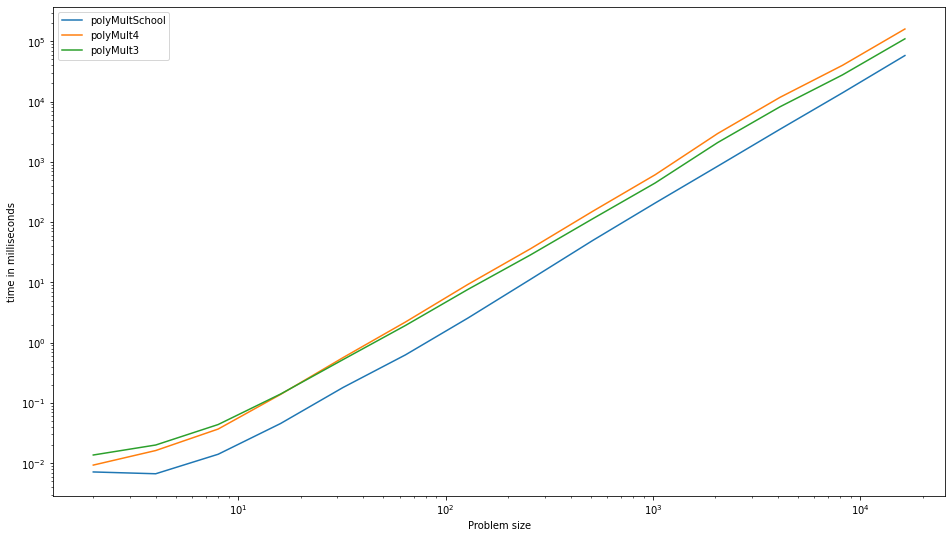

In [ ]:
#average runtime for 10 random problems 2 to 2^14 each
problemSizes = [2**i for i in range(1, 15)]
problemList = [(i, ([random.randint(0,100) for j in range(0,i)], 
                    [random.randint(0,100) for j in range(0,i)], i)) for i in problemSizes]
timeCompareFunctions(problemList, [polyMultSchool, polyMult4,polyMult3], init = None, fit = 'polynomial')


In [ ]:
def avgtimeCompareFunctions(problemList, functionList, init = None, fit = 'exponential'):
  #problemList is a list of tuples [(size, arguments),...] ordered smallest to biggest
  #runs and times the functions contained in functionList with each arguments 
  #generates a graph of run time as a function of problem size
  # fit may be 'exponential' then the time as a function of problem size is assumed
  #     to of the form time = c * a^n and the function solves for c and a
  #     where a is the base of the exponential function and c is a multiplicative factor
  # fit my be 'polynomial' then the time as a function of problem size is assumed
  #     to of the form time = c * n ^ b and the function solves for c and b 
  #     where b is the power of n (the degree of the polynomial) and c is a multiplicative factor
  # setup the graph
    plt.xlabel("Problem size")
    plt.yscale('log')
    if fit == 'polynomial':
      plt.xscale('log')
    plt.ylabel("time in milliseconds")
    plt.rcParams["figure.figsize"] = [16,9]
 # get the problem sizes
    values = [size for (size, args) in problemList]
    # if not functionList is list:
    #   functionList = [functionList]
    # loop through each function
    for function in functionList:
      functionName = str(function).split(" ")[1]
      timeLine = []
      for (size, args) in problemList:
        start_time = time.time()
        function(*args) #use the * to unpack the tuple into arguments to the function
        elapsed = (time.time() - start_time)*1000.0
        timeLine.append(elapsed)
      ##Generating the plot between time taken by each function call with n as variable and n
      plt.plot(values, timeLine, label = functionName)
      # fit these timing studies to a curve
      if fit == 'exponential': #fit a straight line to n and log time
        slope, intercept, _, _, _ = stats.linregress([values], [np.log(t) for t in timeLine])
        print("Function %s time = %.6f %.3f ^ n" % (functionName, np.exp(intercept), np.exp(slope)))
      elif fit == 'polynomial': # fit a straight line to log n and log time
        slope, intercept, _, _, _ = stats.linregress([np.log(v) for v in values], [np.log(t) for t in timeLine])
        print("Function %s time = %.6f n ^ %.3f" % (functionName, np.exp(intercept), slope))
    plt.legend(loc='upper left')
    plt.show()





Function polyMultSchool time = 0.000760 n ^ 1.808
Function polyMult4 time = 0.002285 n ^ 1.871
Function polyMult3 time = 0.002704 n ^ 1.541


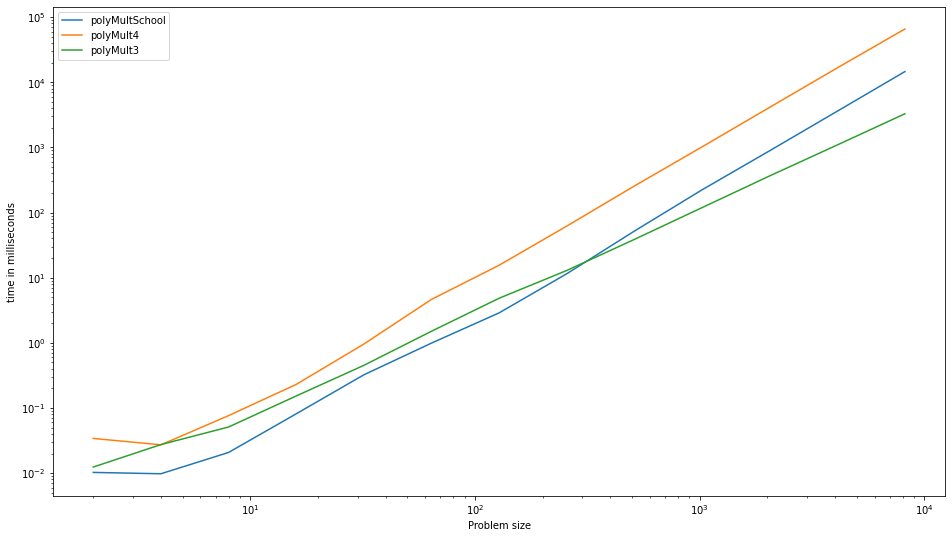

In [ ]:
#Tests only for one one problem of each size
problemSizes = [2**i for i in range(1, 14)]
problemList = [(i, ([random.randint(0,100) for j in range(0,i)], 
                    [random.randint(0,100) for j in range(0,i)], i)) for i in problemSizes]
avgtimeCompareFunctions(problemList, [polyMultSchool, polyMult4,polyMult3], init = None, fit = 'polynomial')

From the graph above: ) 
Function polyMultSchool time =  0.000760 n ^ 1.808
Function polyMult4 time =0.002285 n ^ 1.871
Function polyMult3 time = 0.002704 n ^ 1.541

Polymult4 and oldschool work almost n^2 however polyMult3 works n^1.5 so it is comparatively faster than other two when calculating large problem sizes.

Highscool algo works faster than polyMult4 algorithm  with a factor nearly=  3 from the graph (greater than one means oldschool algo runs faster.)

PolyMult4 and PolyMult3 run same till small problems of size 2^3 after this the polyMult3 starts working faster than PolyMult4.

Old school works faster than PolyMult3 for small problems uptill size than 2^9.
From 2^9 PolyMult3 works faster than oldSchool Algo.

In general the 4 subproblem algorithm works slowest, polyMultSchool works faster than the polymult3 for small problems.
Overall the polyMult3 works faster than both of the other algorithms.



In [ ]:
#problem generator (2^5 = 32) to (2^10 = 1024)
#chec same output for all three algo
def problem_generator_int():
  
  problemSizes = [2**i for i in range(5, 11)]
  print(problemSizes)
  for coeff in problemSizes:
    print("problem size: ",coeff)
    
    P = [0]*coeff
    Q = [0]*coeff 
    for j in range(coeff):
      P[j] = random.randint(0, 50)
      Q[j] = random.randint(0, 50)
    print("P ",P)
    print("Q ",Q)
    x = polyMultSchool(P,Q,coeff)
    y = polyMult4(P,Q,coeff)
    z = polyMult3(P,Q,coeff)
    print("PQ old school ",x)
    print("PQ 4 multiplications ",y)
    print("PQ 3 multiplications ",z)
    print("\n")
    
problem_generator_int()


[32, 64, 128, 256, 512, 1024]
problem size:  32
P  [12, 14, 37, 16, 6, 42, 26, 26, 31, 31, 16, 41, 32, 22, 45, 12, 49, 22, 35, 14, 6, 27, 39, 15, 43, 12, 6, 47, 34, 18, 45, 44]
Q  [37, 49, 42, 29, 18, 38, 13, 31, 37, 38, 23, 43, 40, 42, 45, 29, 40, 6, 18, 30, 47, 38, 33, 21, 6, 31, 10, 36, 25, 9, 37, 5]
PQ old school  [444, 1106, 2559, 3341, 3182, 4301, 5090, 6422, 6806, 7825, 8982, 9526, 10713, 12253, 13943, 13557, 16234, 16063, 17031, 17623, 16770, 19060, 19537, 20807, 20996, 22350, 20710, 23583, 23116, 24288, 25838, 24719, 26916, 23546, 21626, 22453, 22641, 20267, 20934, 19686, 17010, 18082, 16754, 16904, 15670, 12155, 12259, 10619, 9214, 10338, 9116, 8977, 8476, 5682, 5708, 4951, 4017, 4585, 4364, 2341, 2151, 1853, 220, 0]
PQ 4 multiplications  [444, 1106, 2559, 3341, 3182, 4301, 5090, 6422, 6806, 7825, 8982, 9526, 10713, 12253, 13943, 13557, 16234, 16063, 17031, 17623, 16770, 19060, 19537, 20807, 20996, 22350, 20710, 23583, 23116, 24288, 25838, 24719, 26916, 23546, 21626, 22453, 2

In [ ]:
 def problem_generator_float():
  problemSizes = [2**i for i in range(1, 11)]
  print(problemSizes)
  for coeff in problemSizes:
    
    print("problem size: ",coeff)
    P = [0]*coeff
    Q = [0]*coeff
    for j in range(coeff):
      P[j] = random.uniform(1, 50)
      Q[j] = random.uniform(1, 50)
    
    print("P[]= ",P)
    print("Q[]= ",Q)
    print("Testing P and Q on PolyMultSchool,PolyMult4 and PolyMult3")
    print("outputs:")
    x = polyMultSchool(P,Q,coeff)
    y = polyMult4(P,Q,coeff)
    z = polyMult3(P,Q,coeff)
    print(x)
    print(y)
    print(z)



problem_generator_float()

[2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]
problem size:  2
P[]=  [5.481672652052175, 7.159704582223148]
Q[]=  [13.738959763214059, 35.93408739810192]
Testing P and Q on PolyMultSchool,PolyMult4 and PolyMult3
outputs:
[75.31248000165573, 295.34579733829116, 257.27745020219743, 0]
[75.31248000165573, 295.34579733829116, 257.27745020219743, 0]
[75.31248000165573, 295.34579733829116, 257.27745020219743, 0]
problem size:  4
P[]=  [47.855504497581705, 33.0764117656341, 9.248053968231318, 35.58480331313978]
Q[]=  [15.956528993760028, 43.7017663352708, 28.278055531697643, 38.98874116996562]
Testing P and Q on PolyMultSchool,PolyMult4 and PolyMult3
outputs:
[763.6077450266758, 2619.1547987577023, 2946.325073150905, 3773.128726491219, 3106.2434003127, 1366.8390266667493, 1387.4066859601419, 0]
[763.6077450266758, 2619.1547987577023, 2946.325073150905, 3773.128726491219, 3106.2434003127005, 1366.8390266667493, 1387.4066859601419, 0]
[763.6077450266758, 2619.1547987577023, 2946.325073150905, 3773